#### Import required libraries

In [95]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

#### Read data from csv

In [ ]:
cars = pd.read_csv("carAuction.csv")

In [4]:
cars.describe()

,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6116.216000,6720.207200,4.182900,71541.084100,1279.954000
std,2426.340132,1753.796382,1.714509,14688.317704,609.026443
min,0.000000,225.000000,1.000000,4825.000000,462.000000
25%,4255.000000,5435.000000,3.000000,61842.500000,834.000000
50%,6076.000000,6700.000000,4.000000,73506.500000,1169.000000
75%,7732.000000,7880.000000,5.000000,82462.500000,1623.000000
max,27543.000000,29795.000000,9.000000,109734.000000,5913.000000


In [5]:
cars.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,ADESA,WHITE,No,2871,LARGE TRUCK,FORD,5300,8,75419,869,Alloy
1,ADESA,GOLD,Yes,1840,VAN,FORD,3600,8,82944,2322,Alloy
2,ADESA,RED,No,8931,SMALL SUV,CHRYSLER,7500,4,57338,588,Alloy
3,ADESA,GOLD,No,8320,CROSSOVER,FORD,8500,5,55909,1169,Alloy
4,ADESA,GREY,No,11520,LARGE TRUCK,FORD,10100,5,86702,853,Alloy


In [6]:
#cars = pd.get_dummies(cars, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'],drop_first=True)
cars = pd.get_dummies(cars, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'])

In [7]:
cars.head()

,IsBadBuy,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,...,Size_SPORTS,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Alloy,WheelType_Covers,WheelType_Special,WheelType_unkwnWheel
0,No,2871,5300,8,75419,869,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,Yes,1840,3600,8,82944,2322,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2,No,8931,7500,4,57338,588,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,No,8320,8500,5,55909,1169,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,No,11520,10100,5,86702,853,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [8]:
carAuction = cars.iloc[:,:].values
print(carAuction.shape)
#carAuction[1]

(10000, 45)


In [9]:
predictors = np.delete(carAuction, 0, axis=1)  
target = carAuction[:,0] 
print(predictors.shape, target) 

predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, stratify=target, random_state=1)
#print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(10000, 44) ['No' 'Yes' 'No' ... 'No' 'No' 'No']


#### Naive Bayes Model with default parameters

In [96]:
model = BernoulliNB(alpha=1.0, fit_prior=True, class_prior=None)
model.fit(predictors_train, target_train)

BernoulliNB()

#### Prior probabilities

In [99]:
print(model.class_log_prior_)

[-0.13860547 -2.04462612]


In [97]:
y_pred = model.predict(predictors_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')

In [98]:
accuracy = accuracy_score(target_test, y_pred)
accuracy

0.8916666666666667

#### Predictions

In [26]:
prediction_on_test = model.predict(predictors_test)
prediction_on_train = model.predict(predictors_train)

In [27]:
print(prediction_on_test.shape,prediction_on_test)
print(prediction_on_train.shape,prediction_on_train)

(3000,) ['No' 'No' 'No' ... 'No' 'No' 'No']
(7000,) ['No' 'No' 'No' ... 'No' 'No' 'No']


#### Confusion Matrix and result comparision

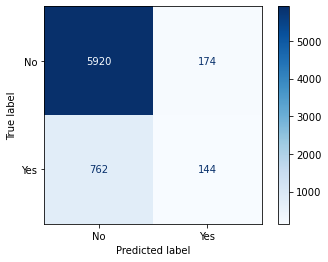

In [28]:
plot_confusion_matrix(model, predictors_train, target_train, cmap=plt.cm.Blues, values_format='d')

In [29]:
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       0.89      0.97      0.93      6094
         Yes       0.45      0.16      0.24       906

    accuracy                           0.87      7000
   macro avg       0.67      0.57      0.58      7000
weighted avg       0.83      0.87      0.84      7000



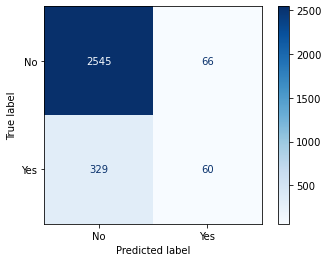

In [30]:
plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [31]:
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.89      0.97      0.93      2611
         Yes       0.48      0.15      0.23       389

    accuracy                           0.87      3000
   macro avg       0.68      0.56      0.58      3000
weighted avg       0.83      0.87      0.84      3000



#### Decision tree model with max depth = 1

In [69]:
model1 = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 1, ccp_alpha = 0.0001)
model1.fit(predictors_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=1,
                       random_state=1)

[Text(1255.5, 1223.1, 'WheelType_unkwnWheel <= 0.5\nentropy = 0.556\nsamples = 7000\nvalue = [6094, 906]\nclass = No'),
 Text(627.75, 407.70000000000005, 'entropy = 0.467\nsamples = 6682\nvalue = [6018, 664]\nclass = No'),
 Text(1883.25, 407.70000000000005, 'entropy = 0.793\nsamples = 318\nvalue = [76, 242]\nclass = Yes')]

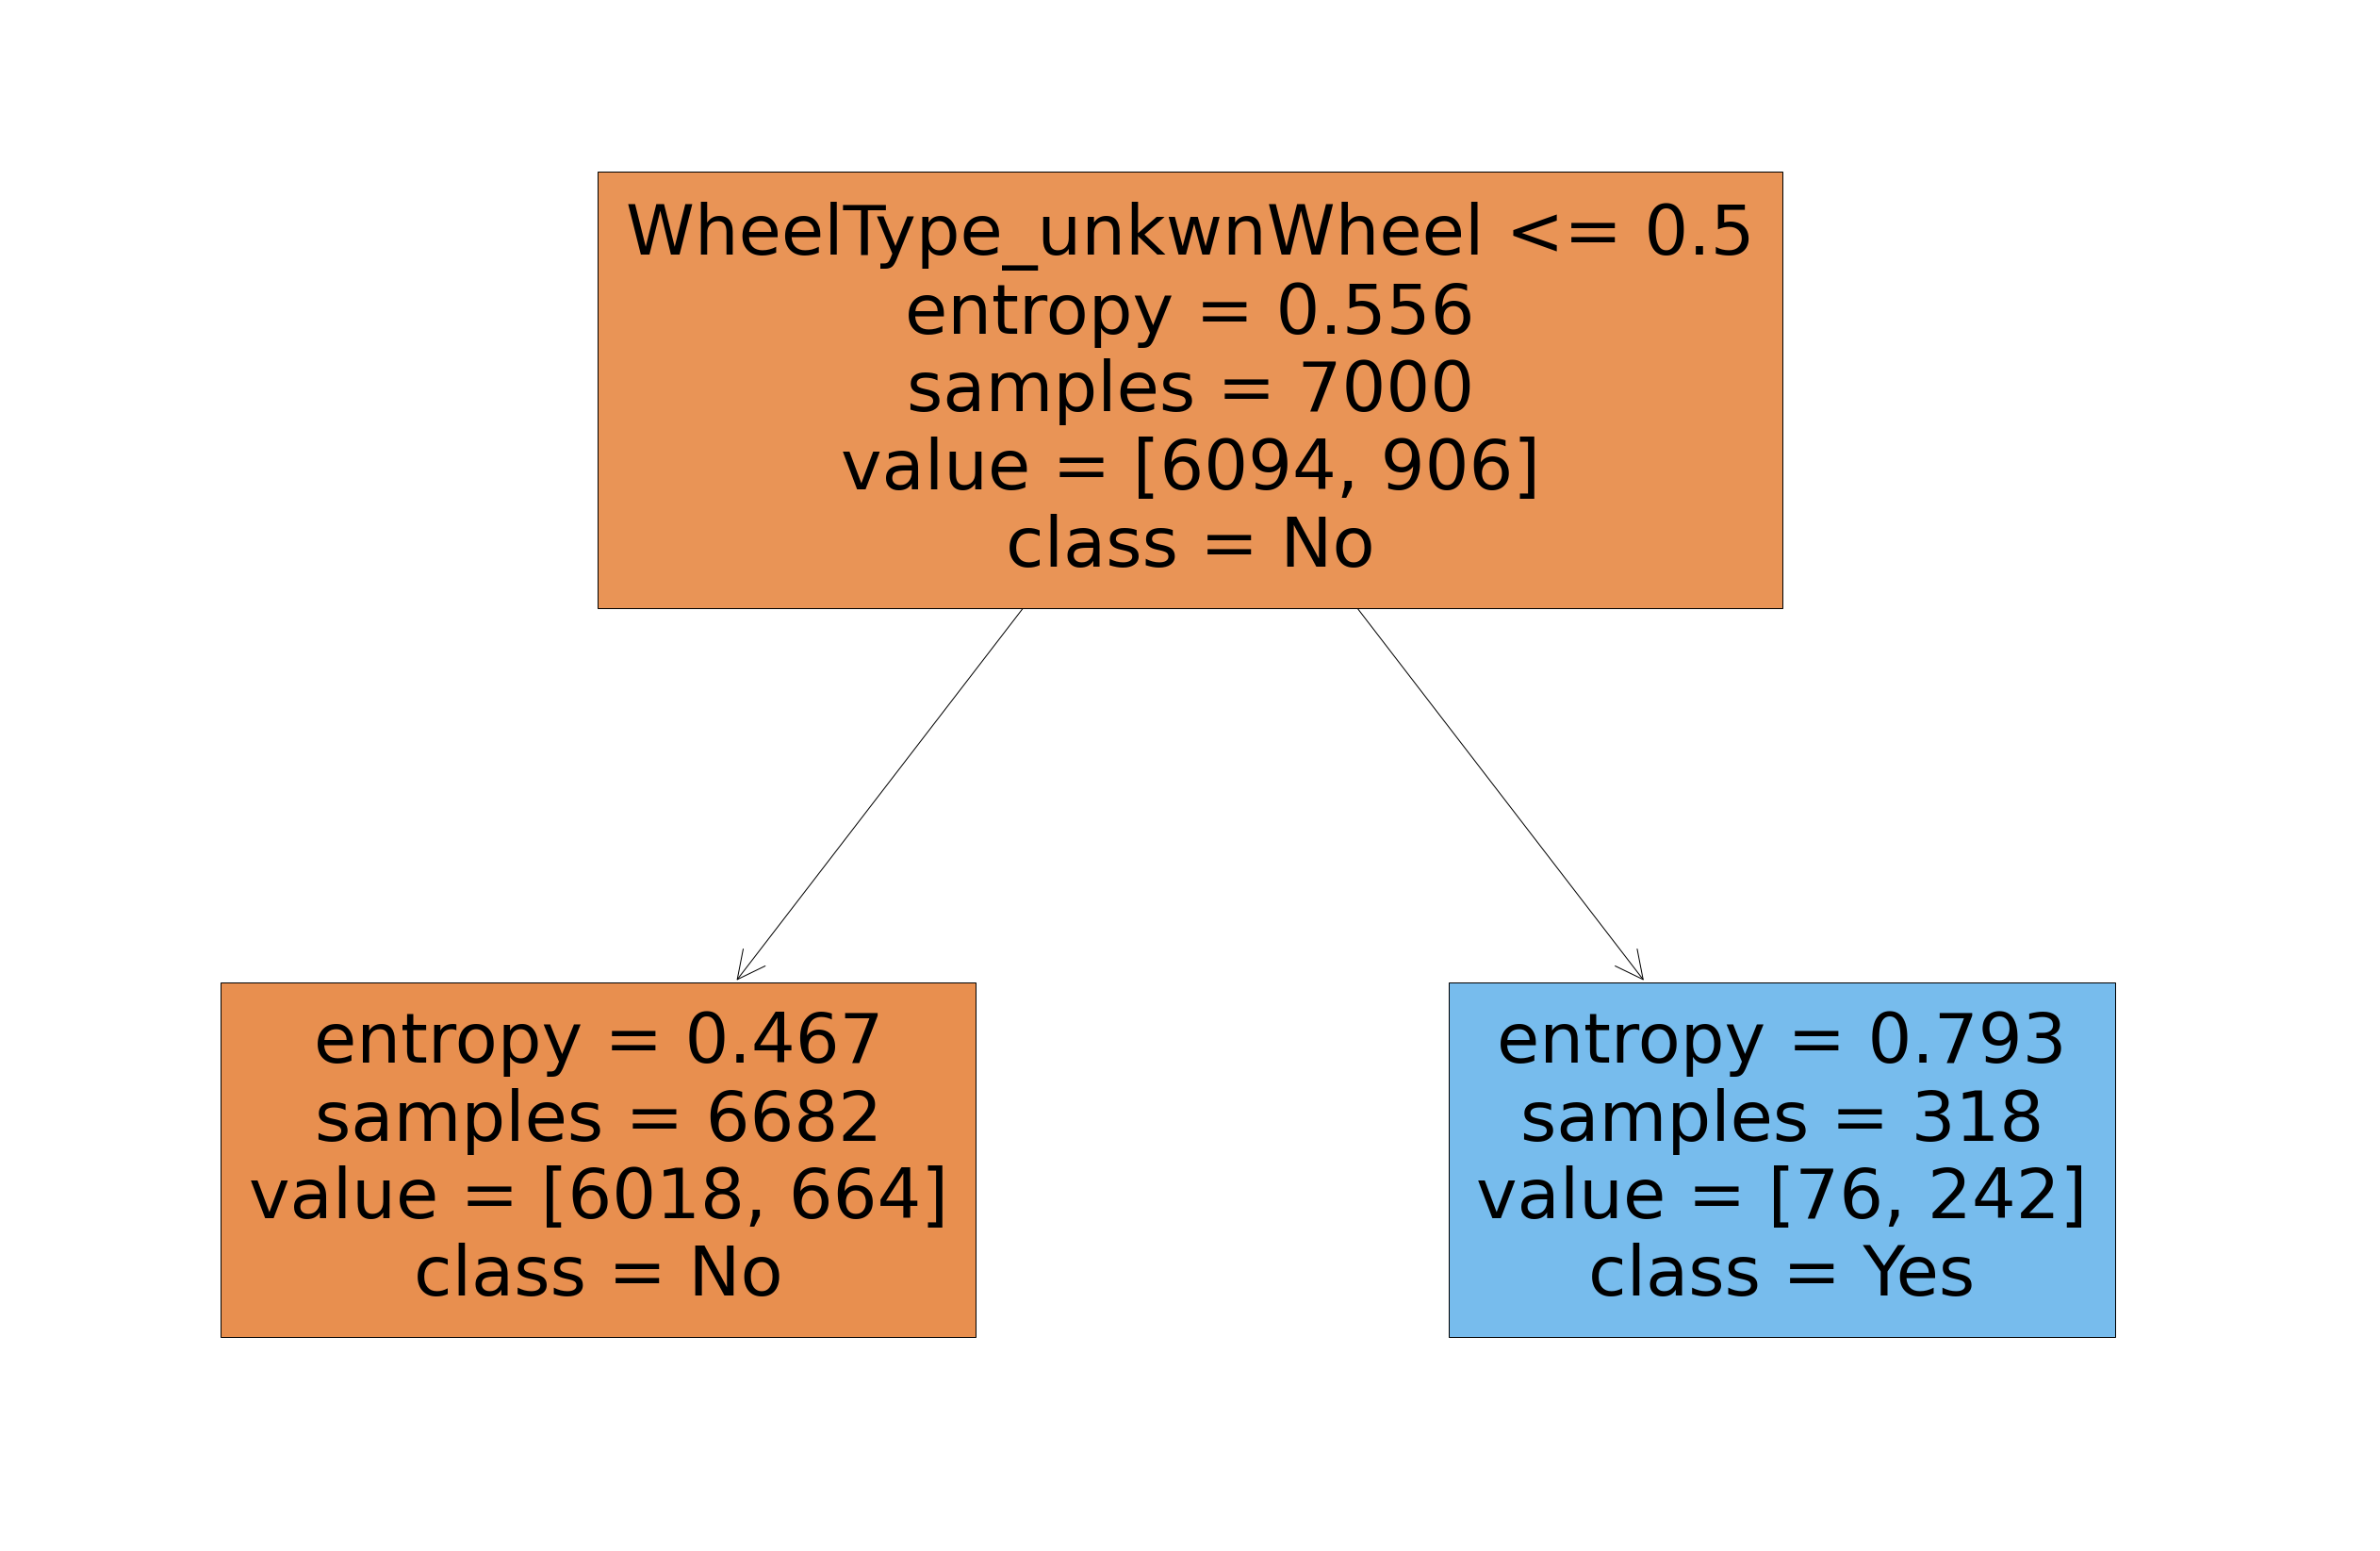

In [68]:
fig = plt.figure(figsize=(45,30))
tree.plot_tree(model1, 
               feature_names=list(cars.columns)[1:],  
               class_names=['No','Yes'],
               filled=True)

In [54]:
print(tree.export_text(model1, feature_names=list(cars.columns)[1:]))

|--- WheelType_unkwnWheel <= 0.50
|   |--- class: No
|--- WheelType_unkwnWheel >  0.50
|   |--- class: Yes



#### Predictions

In [17]:
prediction_on_test1 = model1.predict(predictors_test)
prediction_on_train1 = model1.predict(predictors_train)

In [18]:
print(prediction_on_test1.shape,prediction_on_test1)
print(prediction_on_train1.shape,prediction_on_train1)

(3000,) ['No' 'No' 'No' ... 'No' 'No' 'No']
(7000,) ['No' 'No' 'No' ... 'No' 'No' 'No']


#### Confusion Matrix and results comparision

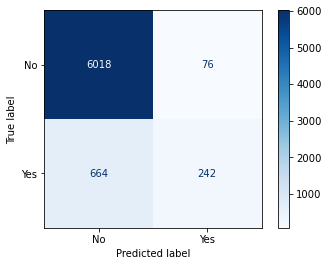

In [22]:
plot_confusion_matrix(model1, predictors_train, target_train, cmap=plt.cm.Blues, values_format='d')

In [20]:
print(classification_report(target_train, prediction_on_train1))

              precision    recall  f1-score   support

          No       0.90      0.99      0.94      6094
         Yes       0.76      0.27      0.40       906

    accuracy                           0.89      7000
   macro avg       0.83      0.63      0.67      7000
weighted avg       0.88      0.89      0.87      7000



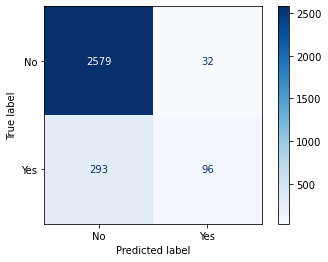

In [21]:
plot_confusion_matrix(model1, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [23]:
print(classification_report(target_test, prediction_on_test1))

              precision    recall  f1-score   support

          No       0.90      0.99      0.94      2611
         Yes       0.75      0.25      0.37       389

    accuracy                           0.89      3000
   macro avg       0.82      0.62      0.66      3000
weighted avg       0.88      0.89      0.87      3000



#### Decision tree model with max depth = 2

In [55]:
model2 = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 2, ccp_alpha = 0.0001)
model2.fit(predictors_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=2,
                       random_state=1)

[Text(1255.5, 1359.0, 'WheelType_unkwnWheel <= 0.5\nentropy = 0.556\nsamples = 7000\nvalue = [6094, 906]\nclass = No'),
 Text(627.75, 815.3999999999999, 'VehicleAge <= 4.5\nentropy = 0.467\nsamples = 6682\nvalue = [6018, 664]\nclass = No'),
 Text(313.875, 271.79999999999995, 'entropy = 0.342\nsamples = 4084\nvalue = [3824, 260]\nclass = No'),
 Text(941.625, 271.79999999999995, 'entropy = 0.623\nsamples = 2598\nvalue = [2194, 404]\nclass = No'),
 Text(1883.25, 815.3999999999999, 'Auction_MANHEIM <= 0.5\nentropy = 0.793\nsamples = 318\nvalue = [76, 242]\nclass = Yes'),
 Text(1569.375, 271.79999999999995, 'entropy = 0.491\nsamples = 243\nvalue = [26, 217]\nclass = Yes'),
 Text(2197.125, 271.79999999999995, 'entropy = 0.918\nsamples = 75\nvalue = [50, 25]\nclass = No')]

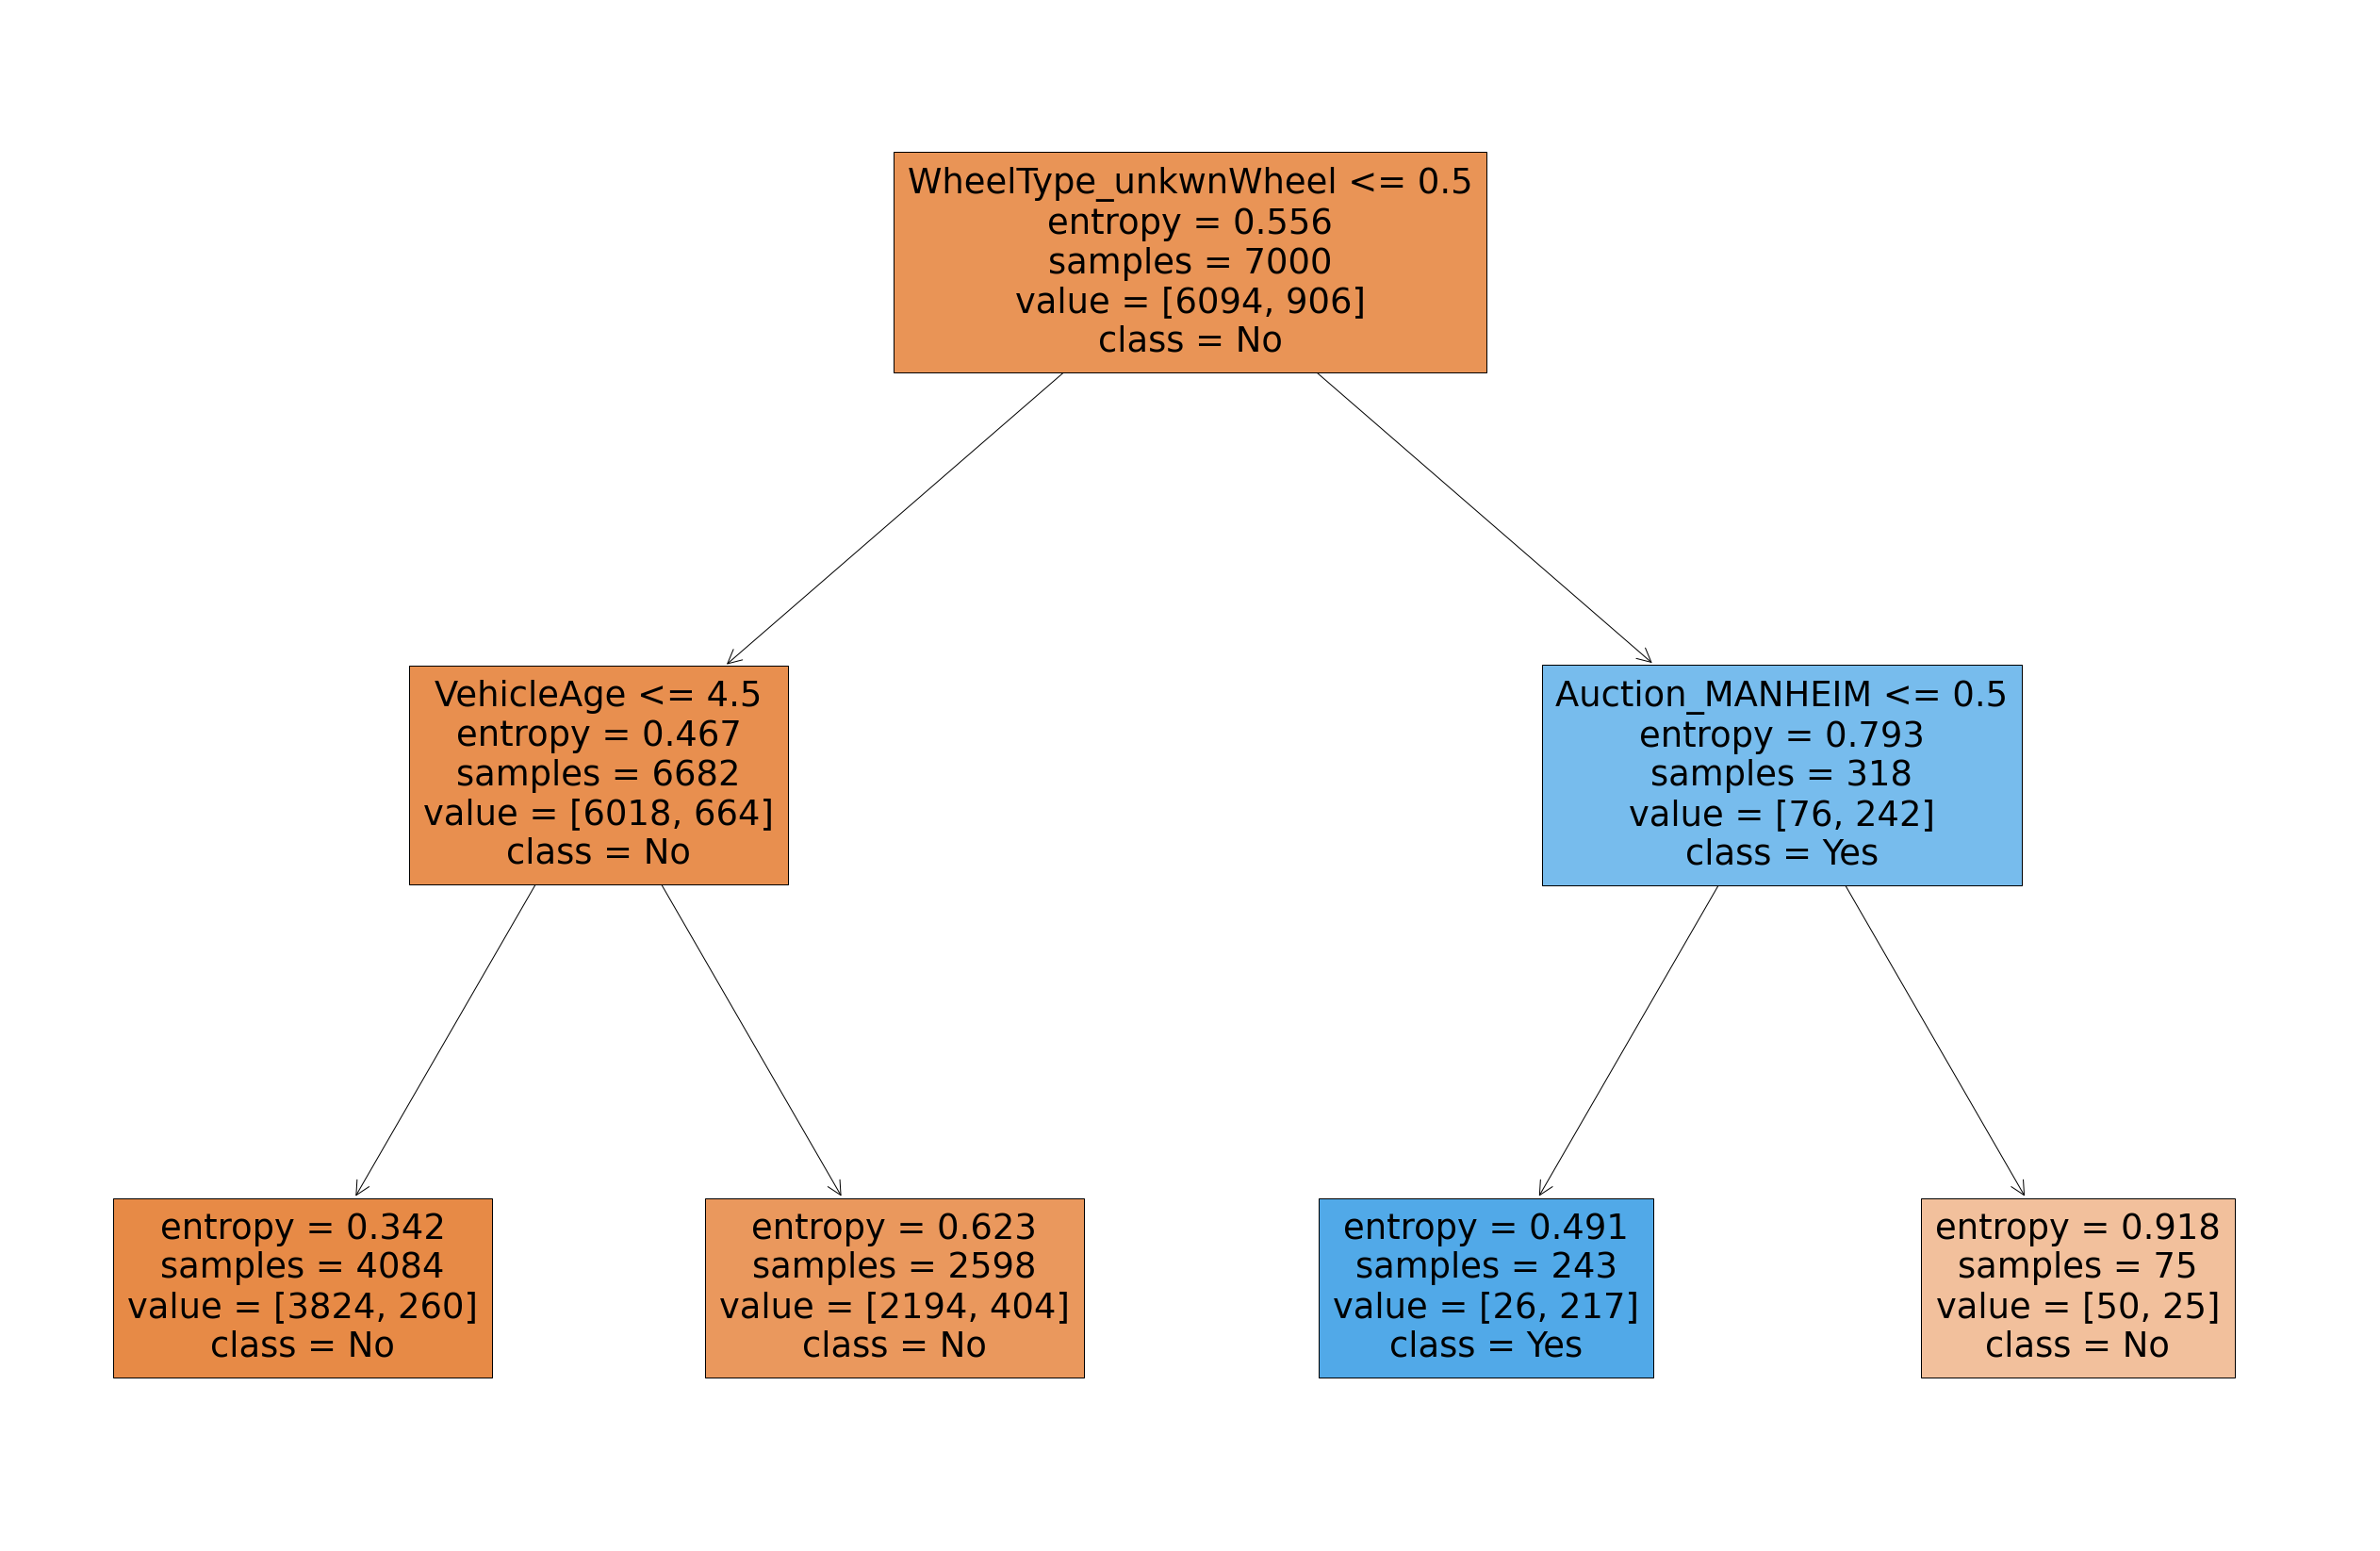

In [56]:
fig = plt.figure(figsize=(45,30))
tree.plot_tree(model2, 
               feature_names=list(cars.columns)[1:],  
               class_names=['No','Yes'],
               filled=True)

In [26]:
print(tree.export_text(model2, feature_names=list(cars.columns)[1:]))

|--- WheelType_unkwnWheel <= 0.50
|   |--- VehicleAge <= 4.50
|   |   |--- class: No
|   |--- VehicleAge >  4.50
|   |   |--- class: No
|--- WheelType_unkwnWheel >  0.50
|   |--- Auction_MANHEIM <= 0.50
|   |   |--- class: Yes
|   |--- Auction_MANHEIM >  0.50
|   |   |--- class: No



#### Predictions

In [34]:
prediction_on_test2 = model2.predict(predictors_test)
prediction_on_train2 = model2.predict(predictors_train)

In [35]:
print(prediction_on_test2.shape,prediction_on_test2)
print(prediction_on_train2.shape,prediction_on_train2)

(3000,) ['No' 'No' 'No' ... 'No' 'No' 'No']
(7000,) ['No' 'No' 'No' ... 'No' 'No' 'No']


#### Confusion Matrix and result comparision

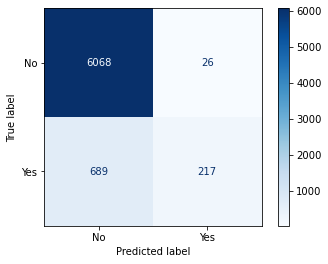

In [36]:
plot_confusion_matrix(model2, predictors_train, target_train, cmap=plt.cm.Blues, values_format='d')

In [37]:
print(classification_report(target_train, prediction_on_train2))

              precision    recall  f1-score   support

          No       0.90      1.00      0.94      6094
         Yes       0.89      0.24      0.38       906

    accuracy                           0.90      7000
   macro avg       0.90      0.62      0.66      7000
weighted avg       0.90      0.90      0.87      7000



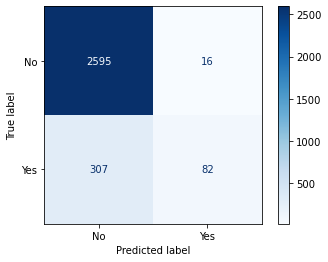

In [38]:
plot_confusion_matrix(model2, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [39]:
print(classification_report(target_test, prediction_on_test2))

              precision    recall  f1-score   support

          No       0.89      0.99      0.94      2611
         Yes       0.84      0.21      0.34       389

    accuracy                           0.89      3000
   macro avg       0.87      0.60      0.64      3000
weighted avg       0.89      0.89      0.86      3000



#### Decision tree model with max depth = 3

In [57]:
model3 = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3,  ccp_alpha = 0.0001)
model3.fit(predictors_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=3,
                       random_state=1)

[Text(1255.5, 1426.95, 'WheelType_unkwnWheel <= 0.5\nentropy = 0.556\nsamples = 7000\nvalue = [6094, 906]\nclass = No'),
 Text(627.75, 1019.25, 'VehicleAge <= 4.5\nentropy = 0.467\nsamples = 6682\nvalue = [6018, 664]\nclass = No'),
 Text(313.875, 611.55, 'VehBCost <= 7432.5\nentropy = 0.342\nsamples = 4084\nvalue = [3824, 260]\nclass = No'),
 Text(156.9375, 203.8499999999999, 'entropy = 0.392\nsamples = 2460\nvalue = [2270, 190]\nclass = No'),
 Text(470.8125, 203.8499999999999, 'entropy = 0.256\nsamples = 1624\nvalue = [1554, 70]\nclass = No'),
 Text(941.625, 611.55, 'VehBCost <= 5827.5\nentropy = 0.623\nsamples = 2598\nvalue = [2194, 404]\nclass = No'),
 Text(784.6875, 203.8499999999999, 'entropy = 0.719\nsamples = 1295\nvalue = [1038, 257]\nclass = No'),
 Text(1098.5625, 203.8499999999999, 'entropy = 0.508\nsamples = 1303\nvalue = [1156, 147]\nclass = No'),
 Text(1883.25, 1019.25, 'Auction_MANHEIM <= 0.5\nentropy = 0.793\nsamples = 318\nvalue = [76, 242]\nclass = Yes'),
 Text(1569.37

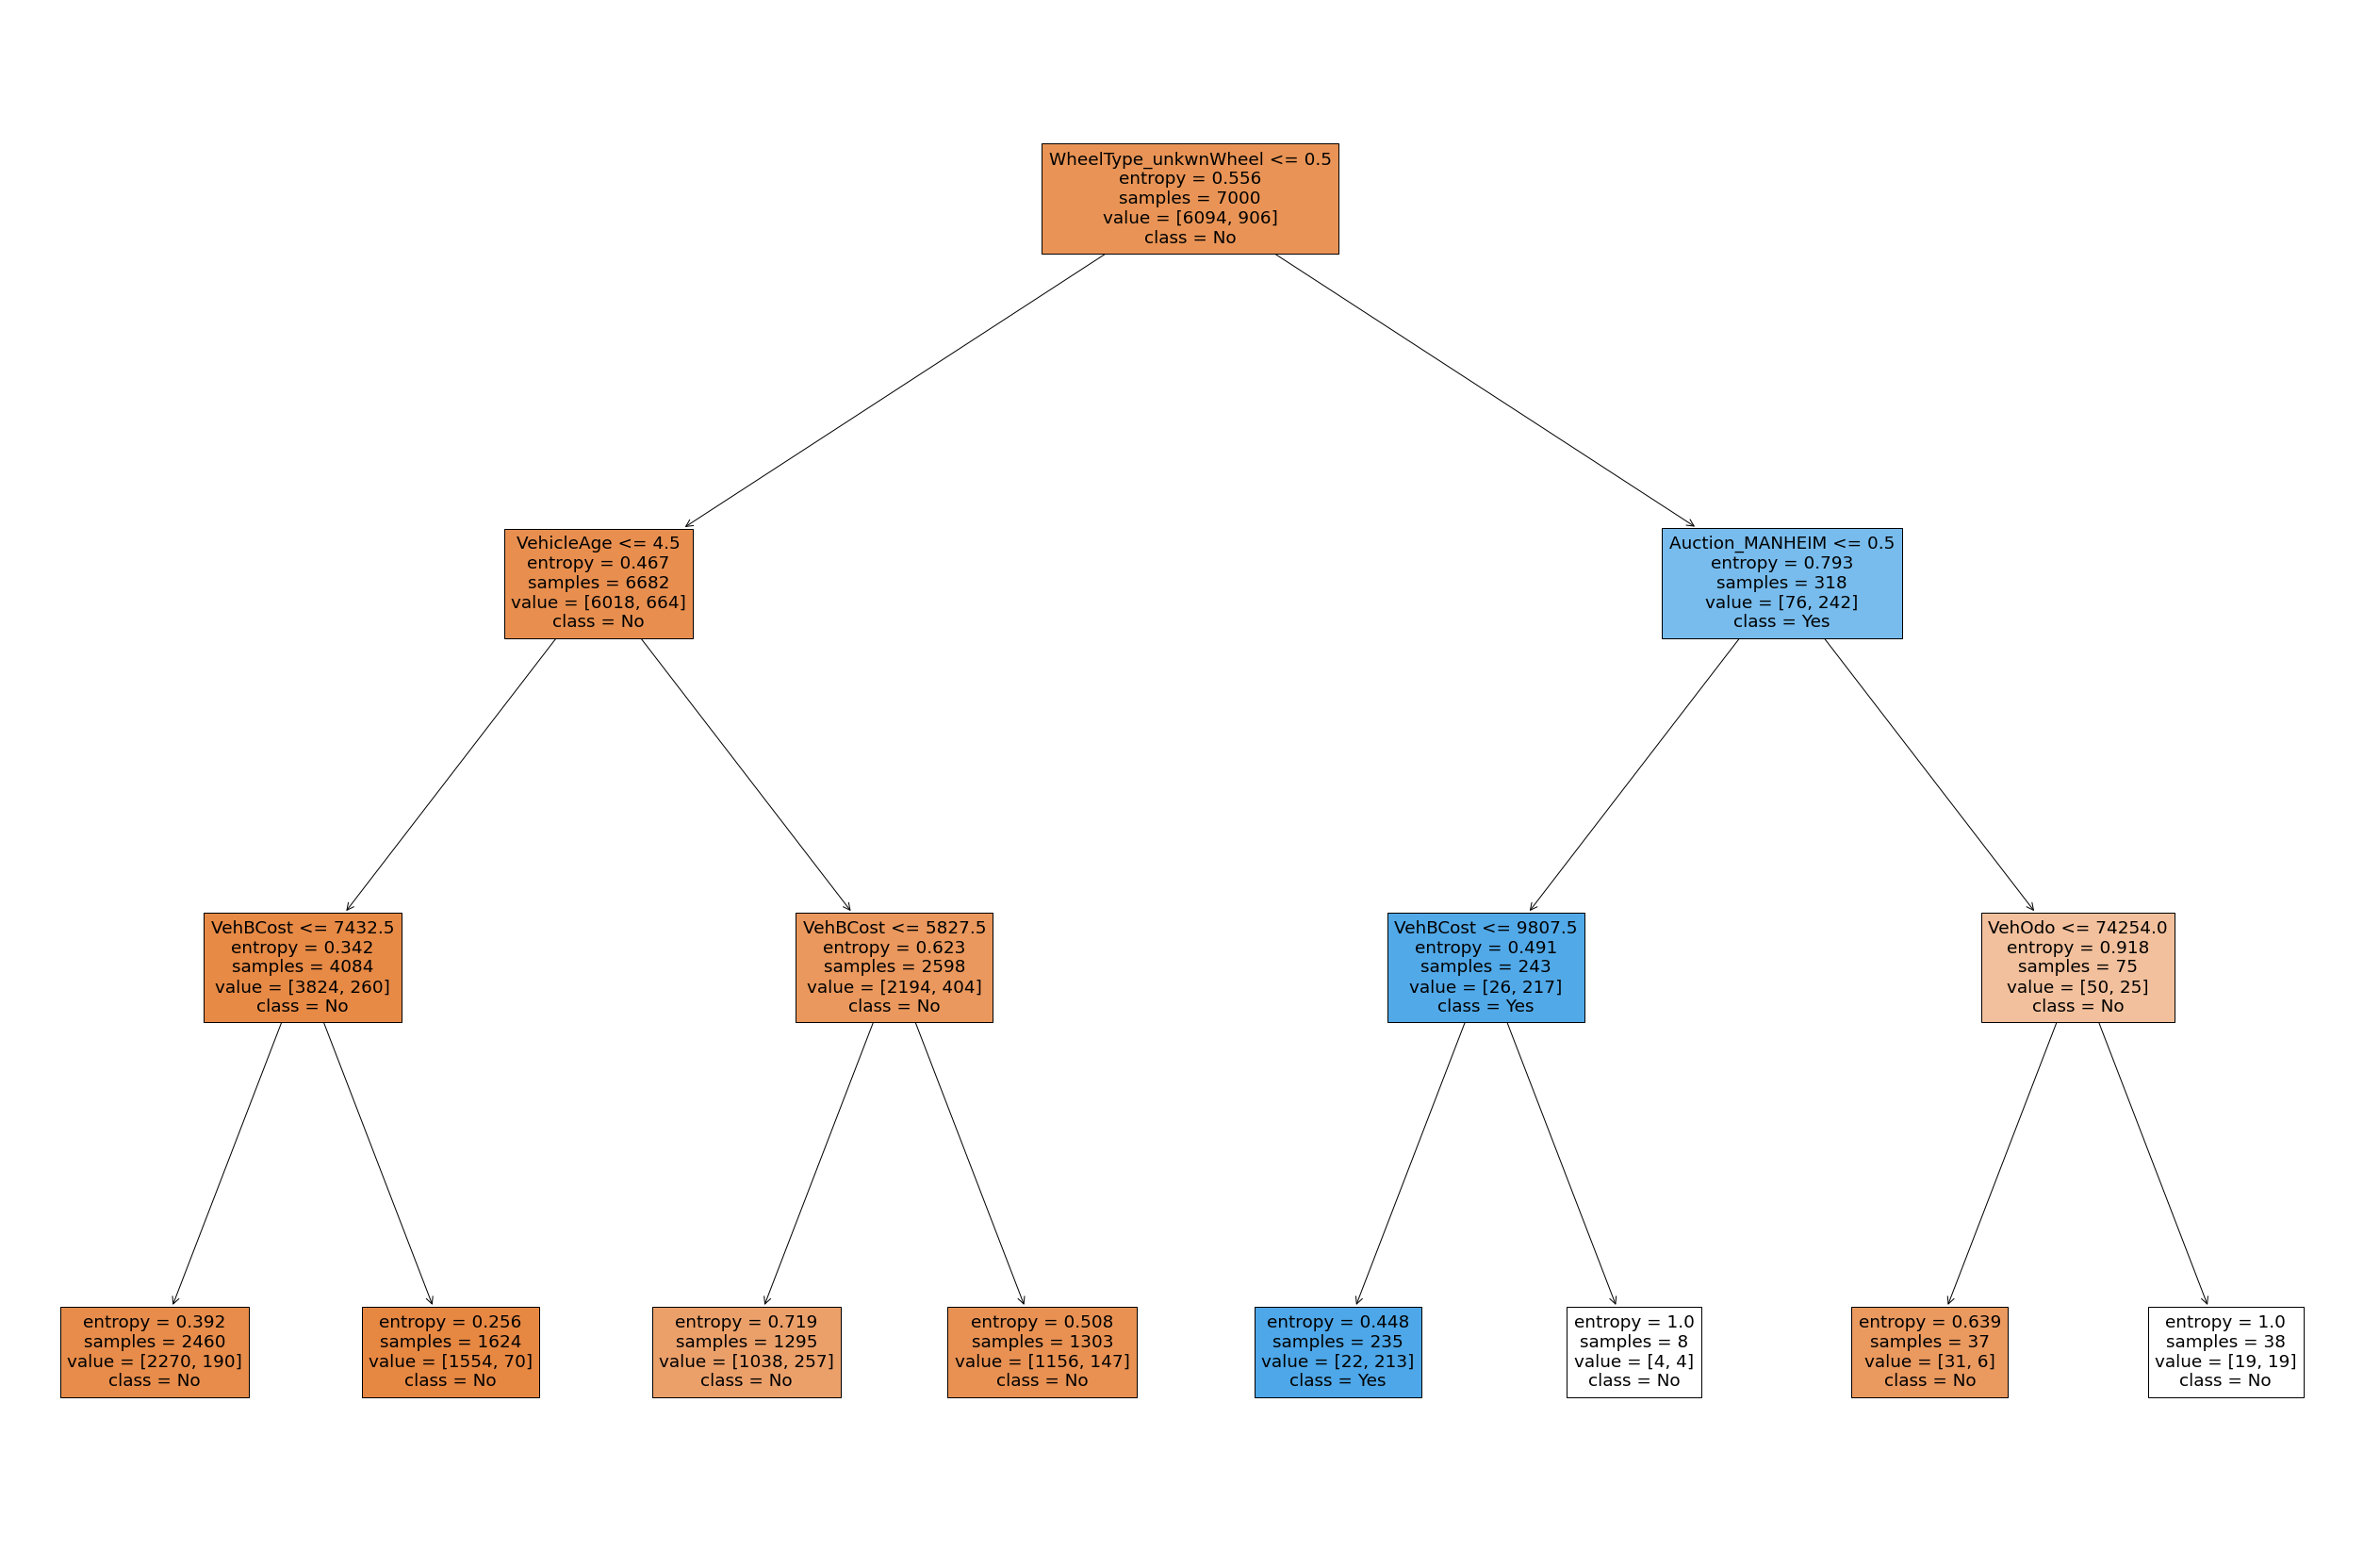

In [58]:
fig = plt.figure(figsize=(45,30))
tree.plot_tree(model3, 
               feature_names=list(cars.columns)[1:],  
               class_names=['No','Yes'],
               filled=True)

In [59]:
print(tree.export_text(model3, feature_names=list(cars.columns)[1:]))

|--- WheelType_unkwnWheel <= 0.50
|   |--- VehicleAge <= 4.50
|   |   |--- VehBCost <= 7432.50
|   |   |   |--- class: No
|   |   |--- VehBCost >  7432.50
|   |   |   |--- class: No
|   |--- VehicleAge >  4.50
|   |   |--- VehBCost <= 5827.50
|   |   |   |--- class: No
|   |   |--- VehBCost >  5827.50
|   |   |   |--- class: No
|--- WheelType_unkwnWheel >  0.50
|   |--- Auction_MANHEIM <= 0.50
|   |   |--- VehBCost <= 9807.50
|   |   |   |--- class: Yes
|   |   |--- VehBCost >  9807.50
|   |   |   |--- class: No
|   |--- Auction_MANHEIM >  0.50
|   |   |--- VehOdo <= 74254.00
|   |   |   |--- class: No
|   |   |--- VehOdo >  74254.00
|   |   |   |--- class: No



#### Predictions

In [40]:
prediction_on_test3 = model3.predict(predictors_test)
prediction_on_train3 = model3.predict(predictors_train)

In [41]:
print(prediction_on_test3.shape,prediction_on_test3)
print(prediction_on_train3.shape,prediction_on_train3)

(3000,) ['No' 'No' 'No' ... 'No' 'No' 'No']
(7000,) ['No' 'No' 'No' ... 'No' 'No' 'No']


#### Confusion Matrix and result comparision

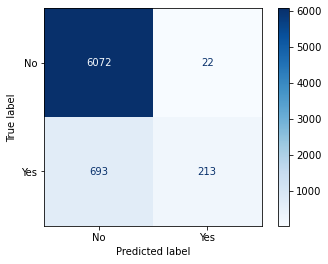

In [42]:
plot_confusion_matrix(model3, predictors_train, target_train, cmap=plt.cm.Blues, values_format='d')

In [43]:
print(classification_report(target_train, prediction_on_train3))

              precision    recall  f1-score   support

          No       0.90      1.00      0.94      6094
         Yes       0.91      0.24      0.37       906

    accuracy                           0.90      7000
   macro avg       0.90      0.62      0.66      7000
weighted avg       0.90      0.90      0.87      7000



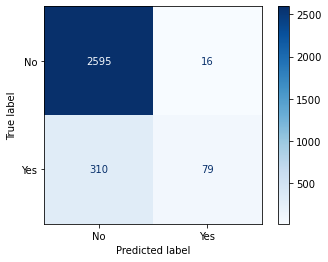

In [44]:
plot_confusion_matrix(model3, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [45]:
print(classification_report(target_test, prediction_on_test3))

              precision    recall  f1-score   support

          No       0.89      0.99      0.94      2611
         Yes       0.83      0.20      0.33       389

    accuracy                           0.89      3000
   macro avg       0.86      0.60      0.63      3000
weighted avg       0.89      0.89      0.86      3000



#### Decision tree model with max depth = 4

In [60]:
model4 = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 4,  ccp_alpha = 0.0001)
model4.fit(predictors_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=4,
                       random_state=1)

[Text(1255.5, 1467.72, 'WheelType_unkwnWheel <= 0.5\nentropy = 0.556\nsamples = 7000\nvalue = [6094, 906]\nclass = No'),
 Text(627.75, 1141.56, 'VehicleAge <= 4.5\nentropy = 0.467\nsamples = 6682\nvalue = [6018, 664]\nclass = No'),
 Text(313.875, 815.4000000000001, 'VehBCost <= 7432.5\nentropy = 0.342\nsamples = 4084\nvalue = [3824, 260]\nclass = No'),
 Text(156.9375, 489.24, 'VehOdo <= 55668.5\nentropy = 0.392\nsamples = 2460\nvalue = [2270, 190]\nclass = No'),
 Text(78.46875, 163.08000000000015, 'entropy = 0.23\nsamples = 561\nvalue = [540, 21]\nclass = No'),
 Text(235.40625, 163.08000000000015, 'entropy = 0.433\nsamples = 1899\nvalue = [1730, 169]\nclass = No'),
 Text(470.8125, 489.24, 'VehBCost <= 13664.5\nentropy = 0.256\nsamples = 1624\nvalue = [1554, 70]\nclass = No'),
 Text(392.34375, 163.08000000000015, 'entropy = 0.248\nsamples = 1621\nvalue = [1554, 67]\nclass = No'),
 Text(549.28125, 163.08000000000015, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Yes'),
 Text(941.6

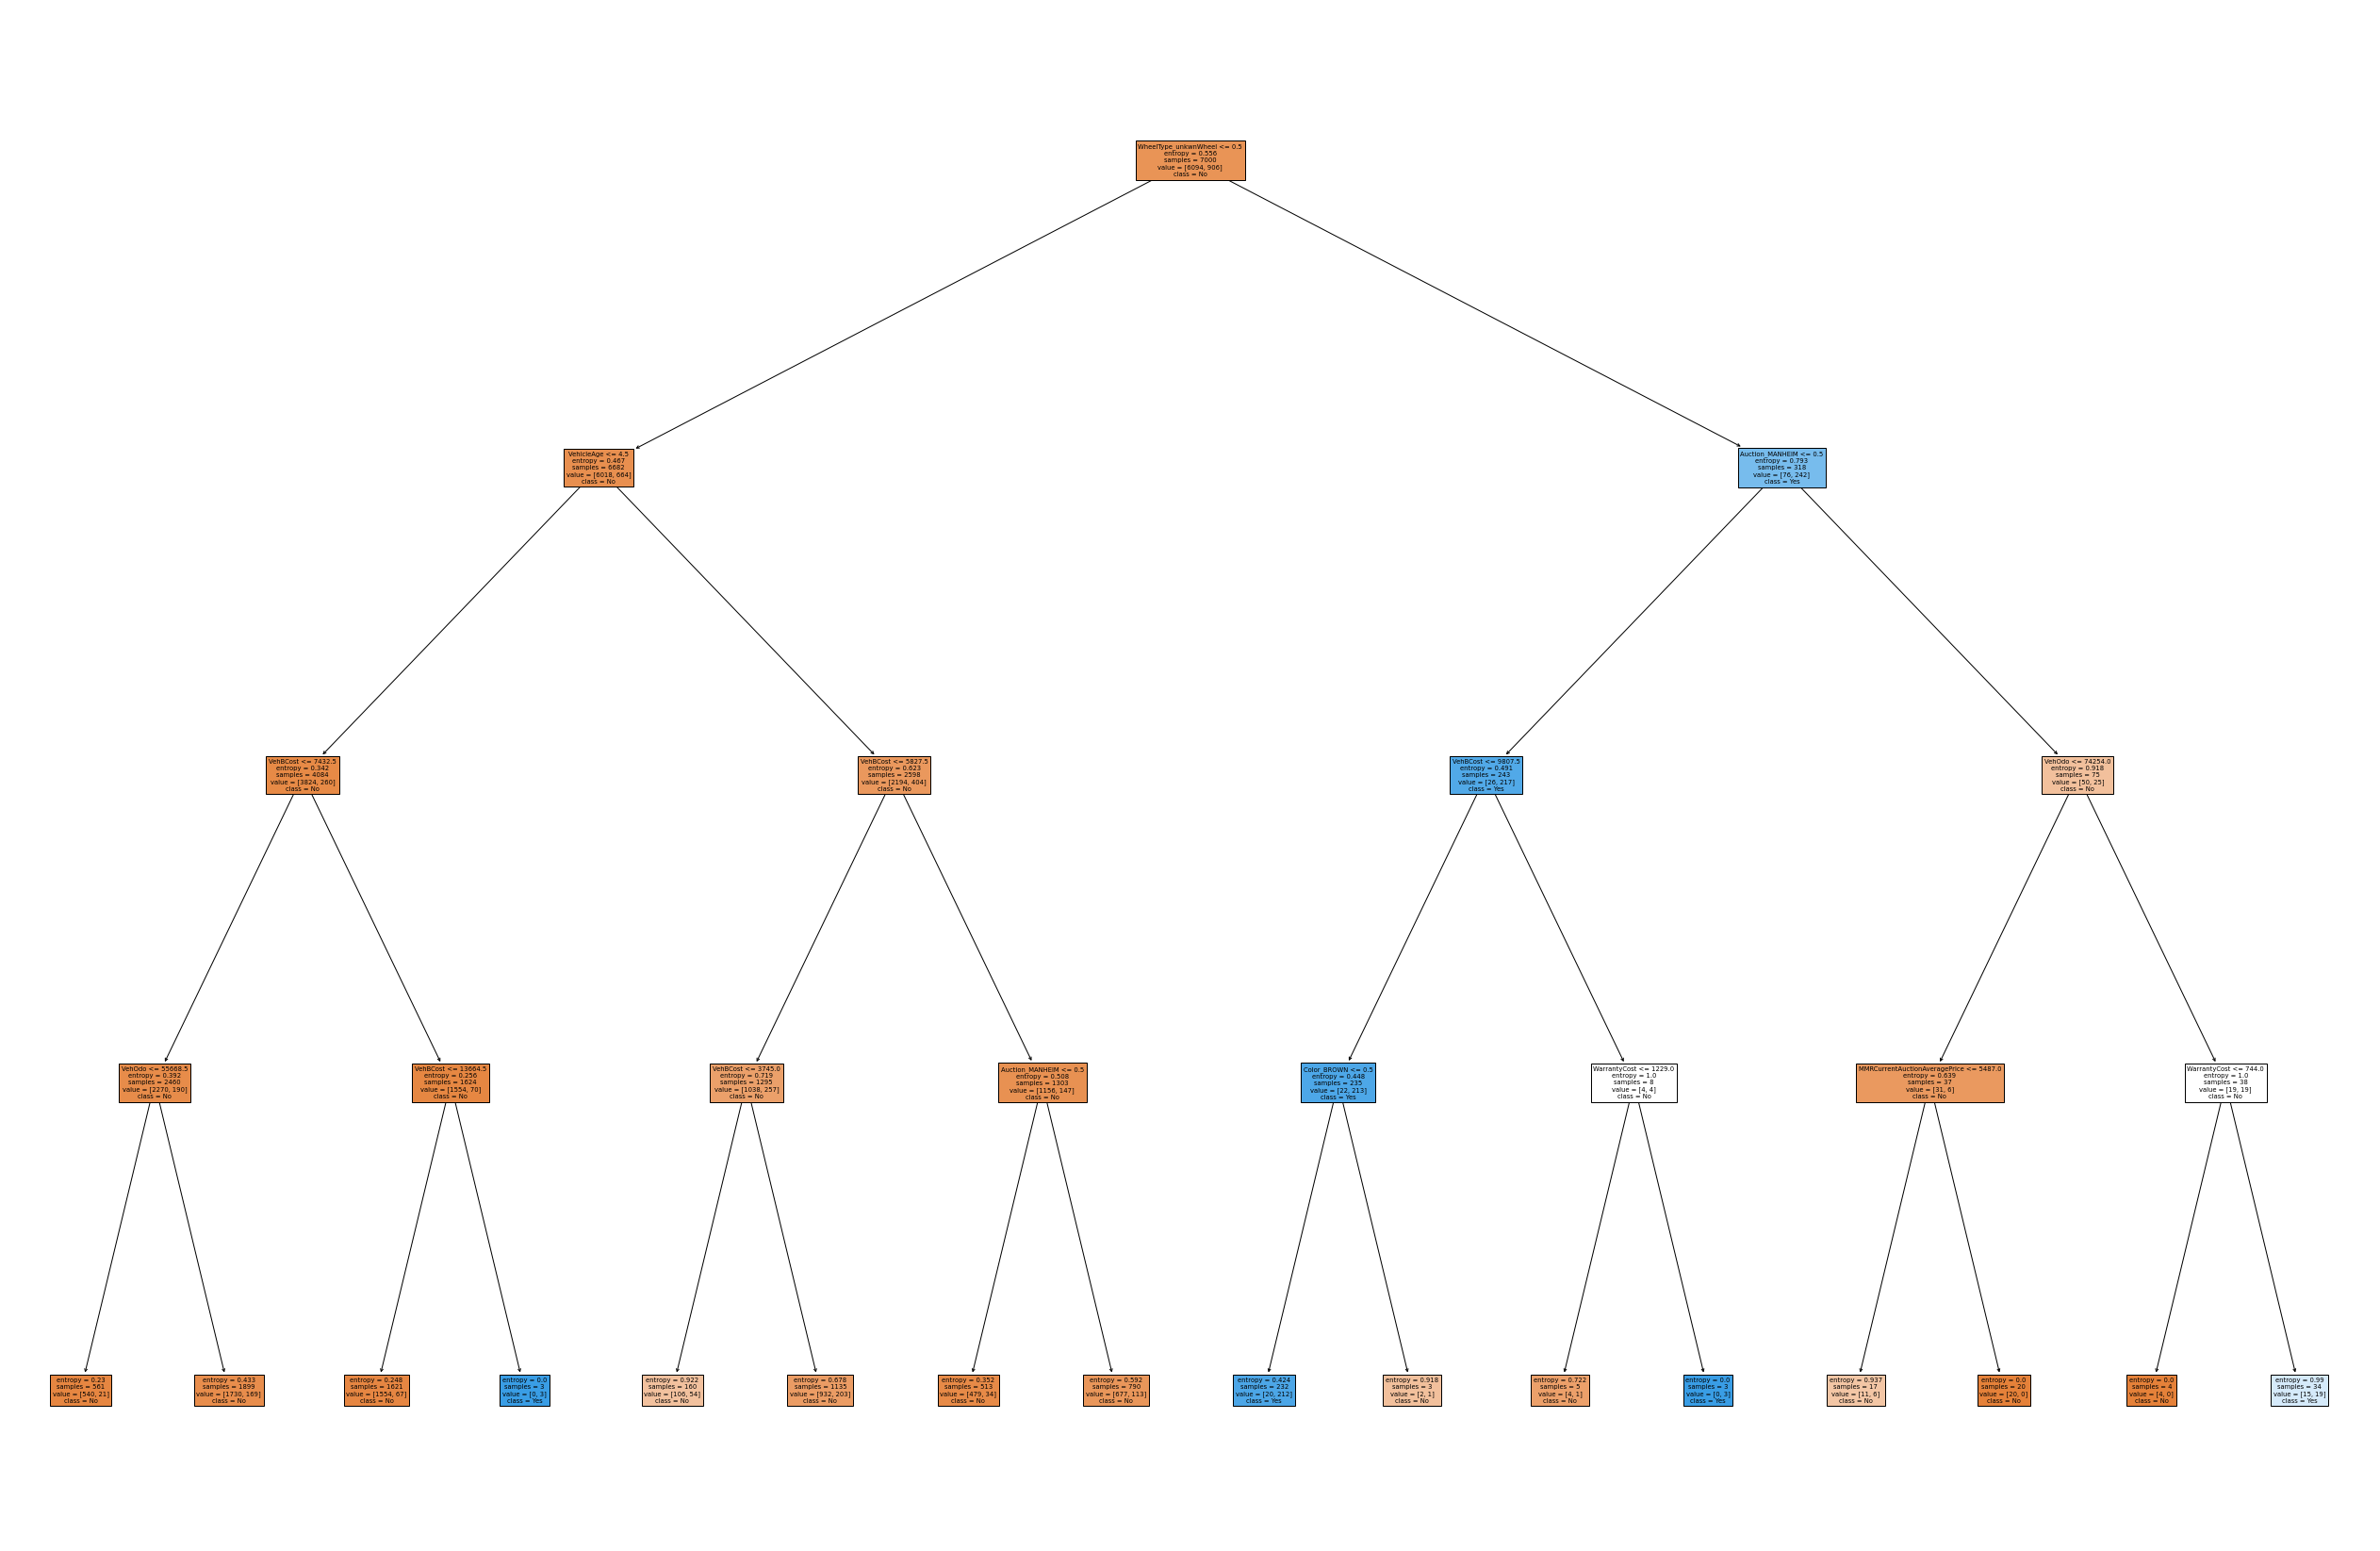

In [61]:
fig = plt.figure(figsize=(45,30))
tree.plot_tree(model4, 
               feature_names=list(cars.columns)[1:],  
               class_names=['No','Yes'],
               filled=True)

In [62]:
print(tree.export_text(model4, feature_names=list(cars.columns)[1:]))

|--- WheelType_unkwnWheel <= 0.50
|   |--- VehicleAge <= 4.50
|   |   |--- VehBCost <= 7432.50
|   |   |   |--- VehOdo <= 55668.50
|   |   |   |   |--- class: No
|   |   |   |--- VehOdo >  55668.50
|   |   |   |   |--- class: No
|   |   |--- VehBCost >  7432.50
|   |   |   |--- VehBCost <= 13664.50
|   |   |   |   |--- class: No
|   |   |   |--- VehBCost >  13664.50
|   |   |   |   |--- class: Yes
|   |--- VehicleAge >  4.50
|   |   |--- VehBCost <= 5827.50
|   |   |   |--- VehBCost <= 3745.00
|   |   |   |   |--- class: No
|   |   |   |--- VehBCost >  3745.00
|   |   |   |   |--- class: No
|   |   |--- VehBCost >  5827.50
|   |   |   |--- Auction_MANHEIM <= 0.50
|   |   |   |   |--- class: No
|   |   |   |--- Auction_MANHEIM >  0.50
|   |   |   |   |--- class: No
|--- WheelType_unkwnWheel >  0.50
|   |--- Auction_MANHEIM <= 0.50
|   |   |--- VehBCost <= 9807.50
|   |   |   |--- Color_BROWN <= 0.50
|   |   |   |   |--- class: Yes
|   |   |   |--- Color_BROWN >  0.50
|   |   |   |   |--

#### Predictions

In [46]:
prediction_on_test4 = model4.predict(predictors_test)
prediction_on_train4 = model4.predict(predictors_train)

In [47]:
print(prediction_on_test4.shape,prediction_on_test4)
print(prediction_on_train4.shape,prediction_on_train4)

(3000,) ['No' 'No' 'No' ... 'No' 'No' 'No']
(7000,) ['No' 'No' 'No' ... 'No' 'No' 'No']


#### Confusion matrix and result comparision

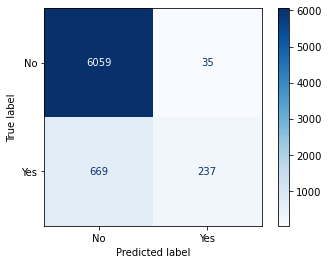

In [48]:
plot_confusion_matrix(model4, predictors_train, target_train, cmap=plt.cm.Blues, values_format='d')

In [49]:
print(classification_report(target_train, prediction_on_train4))

              precision    recall  f1-score   support

          No       0.90      0.99      0.95      6094
         Yes       0.87      0.26      0.40       906

    accuracy                           0.90      7000
   macro avg       0.89      0.63      0.67      7000
weighted avg       0.90      0.90      0.87      7000



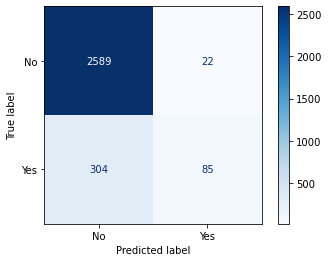

In [50]:
plot_confusion_matrix(model4, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [51]:
print(classification_report(target_test, prediction_on_test4))

              precision    recall  f1-score   support

          No       0.89      0.99      0.94      2611
         Yes       0.79      0.22      0.34       389

    accuracy                           0.89      3000
   macro avg       0.84      0.61      0.64      3000
weighted avg       0.88      0.89      0.86      3000

